In [37]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression,load_diabetes
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

In [2]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise = 20,random_state=13)

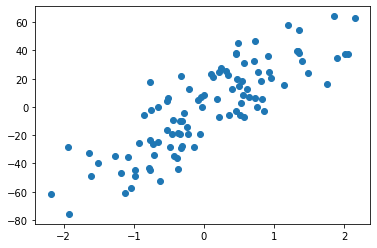

In [3]:
plt.scatter(X,y)

In [5]:
reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

[27.82809103]
-2.29474455867698


In [6]:
rid = Ridge(alpha=10)
rid.fit(X,y)
print(rid.coef_)
print(rid.intercept_)

[24.9546267]
-2.1269130035235726


In [7]:
rid2 = Ridge(alpha=100)
rid2.fit(X,y)
print(rid2.coef_)
print(rid2.intercept_)

[12.93442104]
-1.4248441496033308


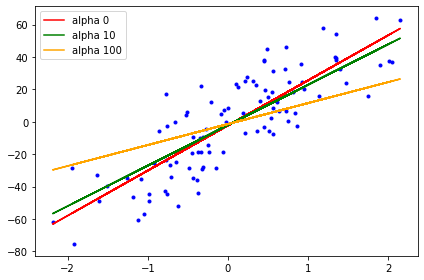

In [10]:
"""
Increasing the value of lambda i.e. alpha resulting in underfitting in this case.
"""
plt.plot(X,y,'b.')
plt.plot(X,reg.predict(X),'red',label = 'alpha 0')
plt.plot(X,rid.predict(X),'green',label = 'alpha 10')
plt.plot(X,rid2.predict(X),'orange',label = 'alpha 100')
plt.legend()
plt.tight_layout()
plt.show()

<b>Ridge Regression from scratch for 1 input feature and 1 output feature.</b>

In [33]:
class RidgeClass:
    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None
    def fit(self,X_train,y_train):
        y_mean = np.mean(y_train)
        x_mean = np.mean(X_train)
        num,den = 0,0
        
        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_mean) * (X_train[i] - x_mean)
            den = den + (X_train[i] - x_mean) ** 2
        
        den = den + self.alpha
        self.m = num/den
        
        self.b = y_mean - self.m * x_mean
        
        print(self.m,self.b)
        
    def predict(self,X_test):
        return  self.m * X_test + self.b

In [35]:
rc = RidgeClass(alpha = 0)
rc.fit(X,y)
y_pred = rc.predict(X)

[27.82809103] [-2.29474456]


<b>Ridge Regression from scratch for n input features and 1 output feature.</b>

In [38]:
X,y = load_diabetes(return_X_y=True)

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=4,train_size=0.8)

In [46]:
"""
Cholesky will use the formulas that we will be using in our self made class
"""
rid = Ridge(alpha=0.1,solver='cholesky')

In [47]:
rid.fit(X_train,y_train)
print(rid.coef_)
print(rid.intercept_)

[  44.02025512 -241.69666596  452.98163524  332.04993719  -76.34010147
  -68.52063199 -164.98817213  149.9687712   431.61985919   58.51762582]
150.89050209333024


In [48]:
y_pred = rid.predict(X_test)
print(r2_score(y_test,y_pred))

0.46930668289209754


In [64]:
class RidgeClassND:
    def __init__(self,alpha = 0.1):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis = 1)
        I = np.identity(X_train.shape[1])
        """
        The first value in identity matrix is being set to zero in sklearn. and to get the exact
        result we are doing this too. That being said, the intercept won't be affected by this logic.
        
        Reason why intercept is not regularized:
        Intercept acts as a receiver of reduction in coefficients thus regularisation of both will not improve the model 
        or in other words you are regularising the curve, not shifting it.
        """
        I[0][0] = 0
        result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        
        self.coef_ = result[1:]
        self.intercept_ = result[0] 
        
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [65]:
rrn = RidgeClassND(alpha = 0.1)
rrn.fit(X_train,y_train)
y_pred = rrn.predict(X_test)
r2 = r2_score(y_test,y_pred)
print(rrn.coef_)
print(rrn.intercept_)
print(r2)

[  44.02025512 -241.69666596  452.98163524  332.04993719  -76.34010147
  -68.52063199 -164.98817213  149.9687712   431.61985919   58.51762582]
150.89050209333027
0.46930668289209776
